In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the dataset into the notebook

In [2]:
ss = pd.read_excel("Concrete_Data.xls")
type(ss)

pandas.core.frame.DataFrame

In [3]:
len(ss)

1030

## Summarize the Dataset

####  Print the shape of the data

In [4]:
ss.shape

(1030, 9)

###### Simplifying Column names, since they appear to be too lengthy.

In [5]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(ss.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

ss = ss.rename(columns=mapper)

In [6]:
ss.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#### List out the feature variables and their data-types

In [7]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BlastFurnaceSlag  1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregate     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CC_Strength       1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### Statistical Summary

In [8]:
ss.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


#### Check for null values in the feature variables

In [9]:
ss.isnull().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

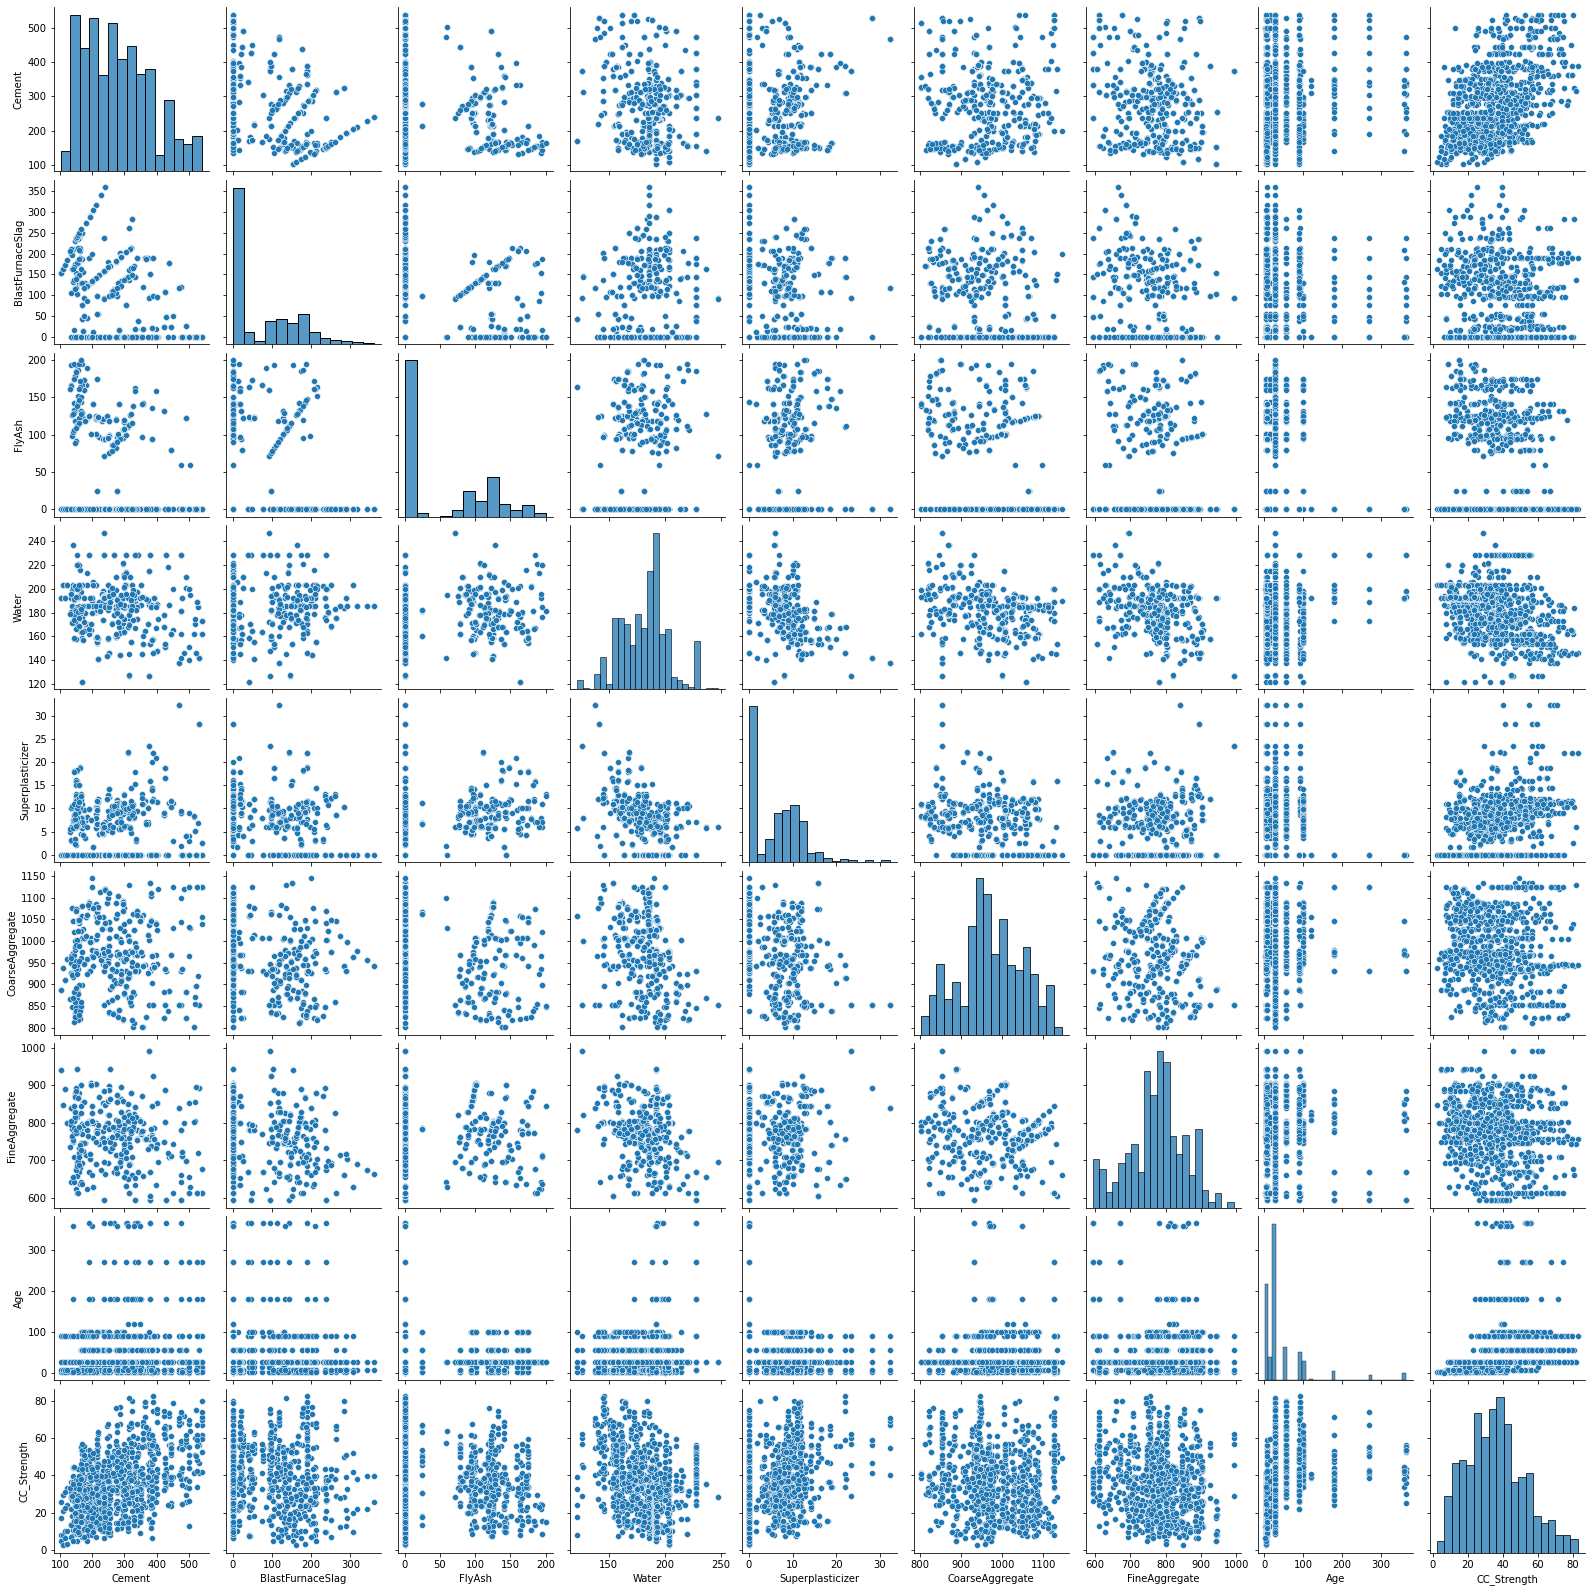

In [10]:
sns.pairplot(ss)
plt.show()

###### There seems to be no high correlation between independant variables. This can be further confirmed by plotting the Pearson Correlation coefficients between the features.

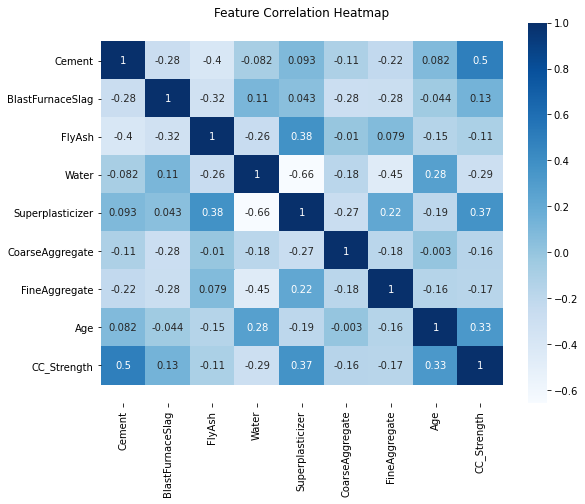

In [11]:
corr = ss.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


#### Observations
###### There are'nt any high correlations between Compressive strength and other features except for Cement, which should be the case for more strength.
###### Age and Super plasticizer are the other two features which are strongly correlated with Compressive Strength.
###### Super Plasticizer seems to have a negative high correlation with Water, positive correlations with Fly ash and Fine aggregate.

In [12]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BlastFurnaceSlag  1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregate     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CC_Strength       1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### Perform univariate analysis 

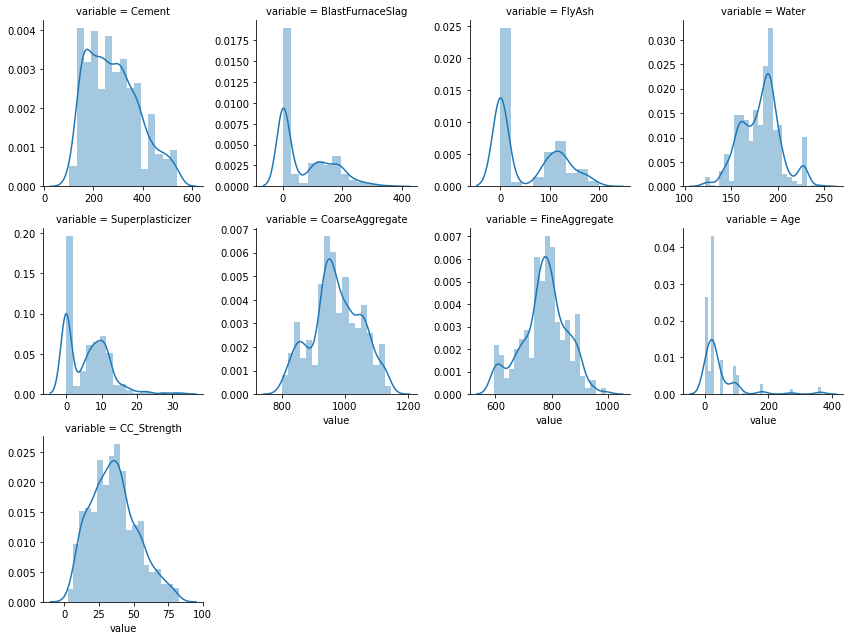

In [13]:
num = [f for f in ss.columns if ss.dtypes[f] != 'object']
nd = pd.melt(ss, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

#### Check for outliers

In [14]:
ss.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CC_Strength'],
      dtype='object')

#### Treat outliers. What is your strategy? What other strategies can be used?

* 1.IQR Method
* 2.Z Score method

In [15]:
ss.shape

(1030, 9)

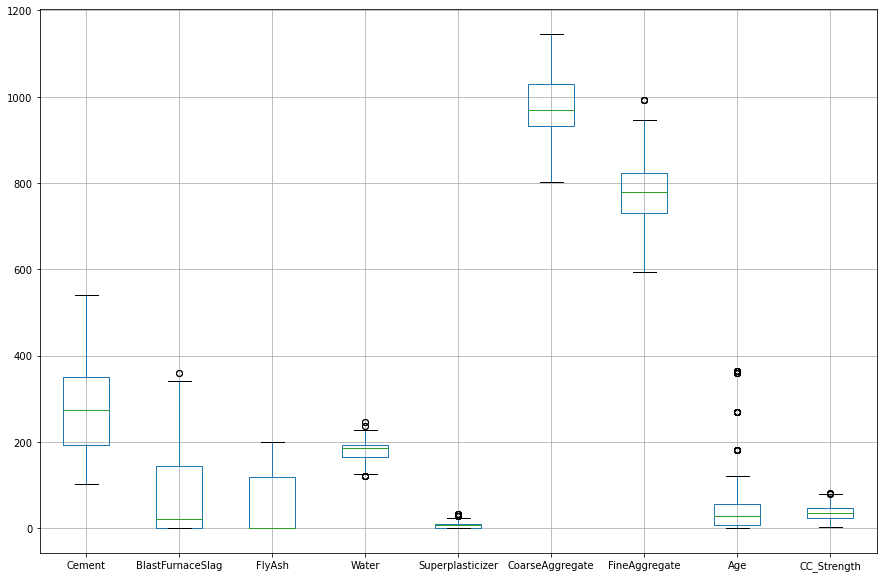

In [29]:
plt.figure(figsize=(15,10))
ss.boxplot()
plt.show()

In [17]:
X = ss.iloc[:,ss.columns !='CC_Strength']
Y = np.array(ss['CC_Strength'])
Low_Quantile = X.quantile(0.05)
High_Quantile = X.quantile(0.95)

In [18]:
LowOutliers_data = (X< Low_Quantile)
HighOutliers_data = (X > High_Quantile)
X.mask(LowOutliers_data, Low_Quantile, axis=1, inplace = True)  
X.mask(HighOutliers_data,High_Quantile,axis =1, inplace = True)

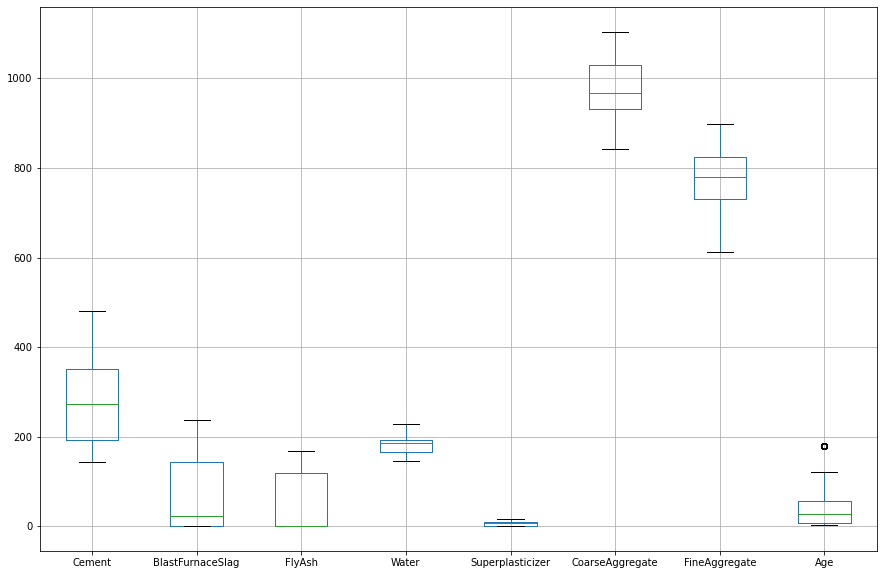

In [19]:
plt.figure(figsize=(15,10))
X.boxplot()
plt.show()

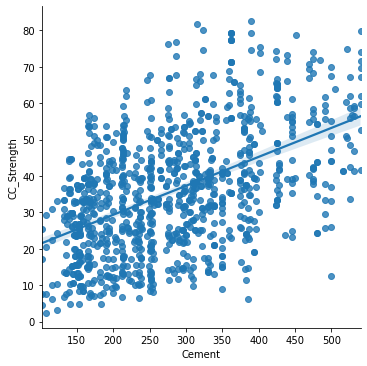

In [20]:
sns.lmplot(x='Cement',y='CC_Strength',data= ss)

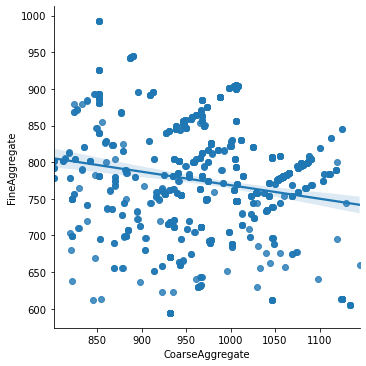

In [21]:
sns.lmplot(x='CoarseAggregate',y='FineAggregate',data = ss)

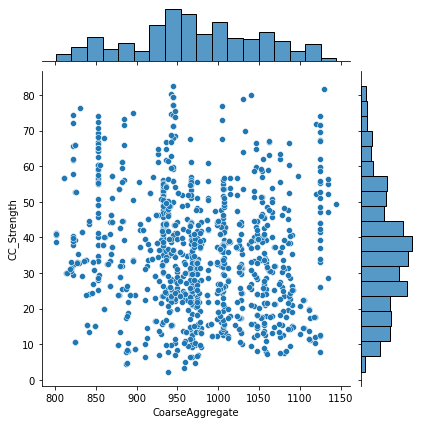

In [22]:
sns.jointplot(ss['CoarseAggregate'],ss['CC_Strength'])

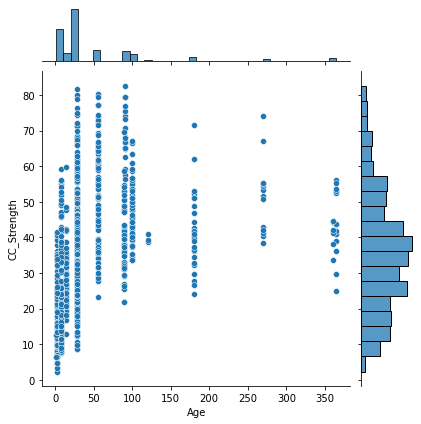

In [23]:
sns.jointplot(ss['Age'],ss['CC_Strength'])

In [24]:
ss.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CC_Strength'],
      dtype='object')

In [25]:
# ss.drop(['Age'],axis=1,inplace = True)

* 3D graph between 3 most important features and target

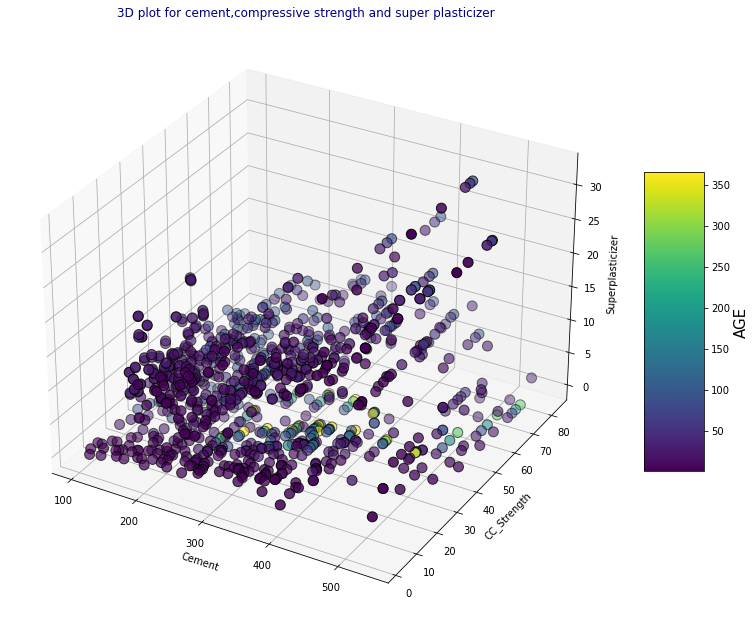

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,11))

ax  = fig.gca(projection = "3d")

plot = ax.scatter(ss["Cement"],ss["CC_Strength"],ss["Superplasticizer"],linewidth=1,edgecolor ="k",c=ss["Age"],s=100,)

ax.set_xlabel("Cement")
ax.set_ylabel("CC_Strength")
ax.set_zlabel("Superplasticizer")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("AGE",fontsize = 15)

plt.title("3D plot for cement,compressive strength and super plasticizer",color="navy")
plt.show()

In [ ]:
ss.columns

#### Perform bi-variate analysis

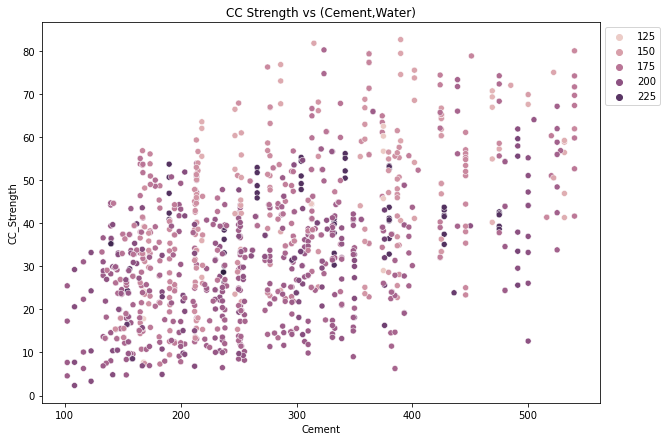

In [34]:
fig, sp = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="Cement", hue="Water", data=ss,sizes=(50, 300))
sp.set_title("CC Strength vs (Cement,Water)")
sp.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### Observations from Strength vs (Cement, Water)
###### Compressive strength increases with amount of cement
###### The older the cement is the more water it requires
###### Concrete strength increases when less water is used in preparing it


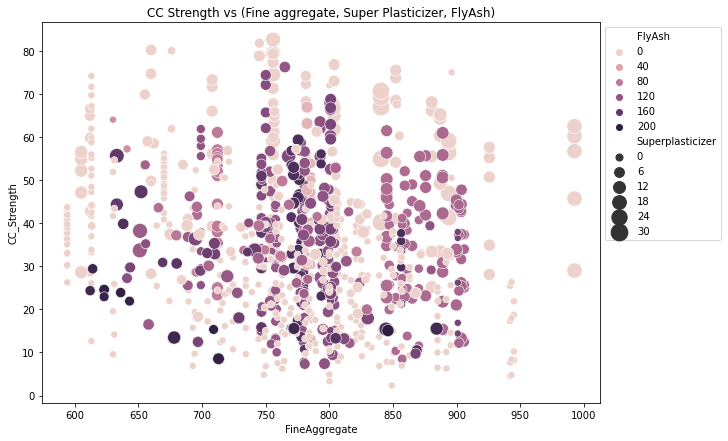

In [35]:
fig, sp = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="FineAggregate", hue="FlyAsh", size="Superplasticizer", 
                data=ss, sizes=(50, 300))
sp.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
sp.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### Observations from CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)
###### As Flyash increases the strength decreases
###### Strength increases with Super plasticizer

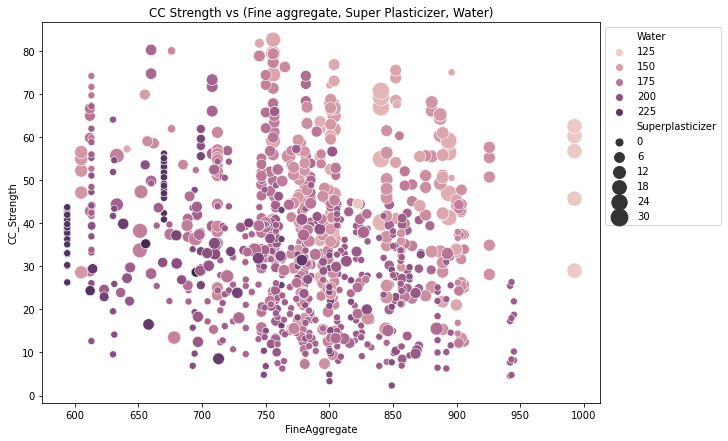

In [36]:
fig, sp = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="FineAggregate", hue="Water", size="Superplasticizer", 
                data=ss,sizes=(50, 300))
sp.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, Water)")
sp.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### Observations from CC Strength vs (Fine aggregate, Super Plasticizer, Water)
###### Strength decreases with increase in water, strength increases with increase in Super plasticizer 
###### More Fine aggregate is used when less water, more Super plasticizer is used.

In [37]:
ss.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CC_Strength'],
      dtype='object')

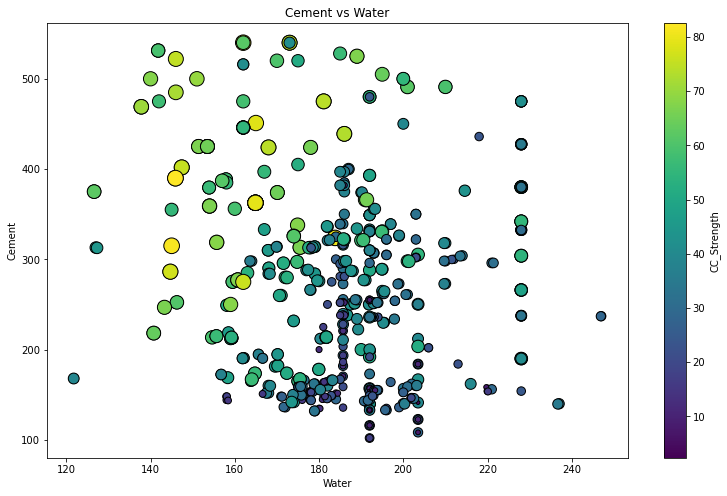

In [38]:
fig = plt.figure(figsize=(13,8))
sp = fig.add_subplot(111)
plt.scatter(ss["Water"],ss["Cement"],
            c=ss["CC_Strength"],s=ss["CC_Strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
sp.set_facecolor("w")
sp.set_xlabel("Water")
sp.set_ylabel("Cement")
lab = plt.colorbar()
lab.set_label("CC_Strength")
plt.title("Cement vs Water")
plt.show()

### Perform below algorithms:

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso             
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR        
from sklearn import metrics
import matplotlib.cm as cm

# Data Preprocessing
* Separating Input Features and Target Variable.

In [40]:
X = ss.iloc[:,:-1]
y = ss.iloc[:,-1]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building
* Training Machine Learning Algorithms on the training data and making predictions on Test data.

In [43]:
ss.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### 1. Linear Regression
* The Go-to method for Regression problems.
* The Algorithm assigns coefficients to each input feature to form a linear relation between input features and target variable, so as to minimize an objective function.
* The objective function used in this case is Mean Squared Error.
* There are three versions of Linear Regression
* Linear Regression - No regularisation
* Lasso Regression - L1 regularisation (Tries to push coefficients to zero)
* Ridge Regression - L2 regularisation (Tries to keep coefficients as low as possible) comparing these three algorithms

In [44]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear 
lr = LinearRegression()
# Lasso
lasso = Lasso()
# Ridge 
ridge = Ridge()

lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

### Evaluation
* Comparing the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error(MAE) and R2 Score.

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.29 		 105.78 	8.23 		0.57
LassoRegression 	 10.68 		 114.13 	8.66 		0.54
RidgeRegression 	 10.29 		 105.86 	8.24 		0.57


* The performance seem to be similar with all the three methods.

##### Plotting the coefficients

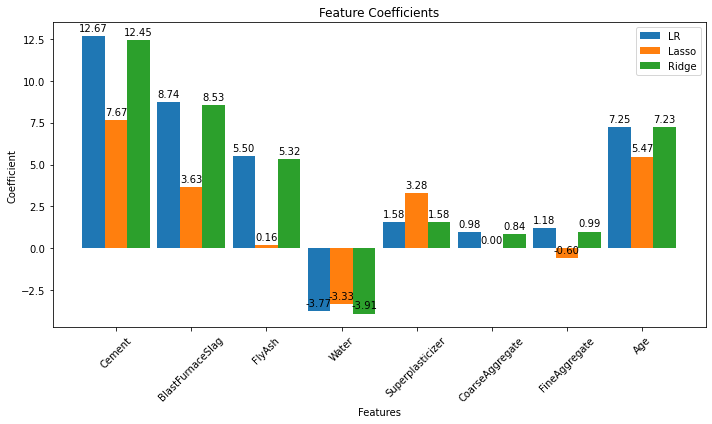

In [46]:
coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')
ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

* Lasso Regression, reduces the complexity of the model by keeping the coefficients as low as possible. Also, Coefficients with Linear and Ridge are almost same.

##### Plotting predictions

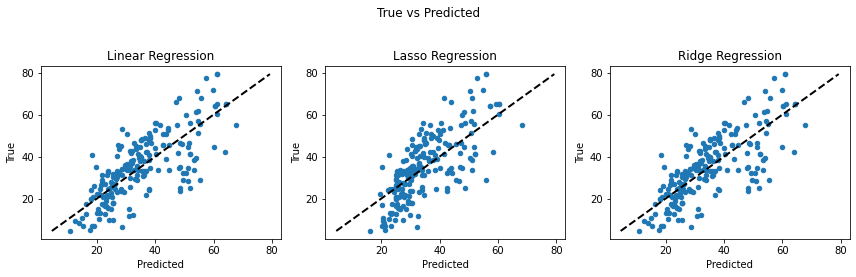

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

* Looking at the graphs between predicted and true values of the target variable, we can conclude that Linear and Ridge Regression perform well as the predictions are closer to the actual values. While Lasso Regression reduces the complexity at the cost of loosing performance in this case.

### Decision Trees
* Another algorithm that would give better performance in this case would be Decision Trees, since we have a lot of zeros in some of the input features as seen from their distributions in the pair plot above. This would help the decision trees build trees based on some conditions on features which can further improve performance.

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 7.31 		 53.37 		4.48 		0.78


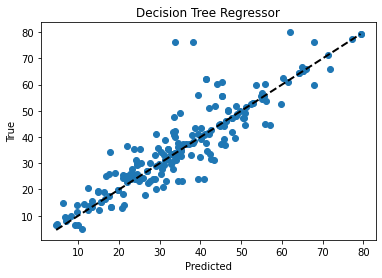

In [48]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

* The Root Mean Squared Error (RMSE) has come down from 10.29 to 7.31, so the Decision Tree Regressor has improved the performance by a significant amount. This can be observed in the plot as well as more points are on the line.

### Random Forest Regressor
* Since Using a Decision Tree Regressor has improved our performance, we can further improve the performance by ensembling more trees. Random Forest Regressor trains randomly initialized trees with random subsets of data sampled from the training data, this will make our model more robust

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.08 		 25.86 		3.46 		0.89


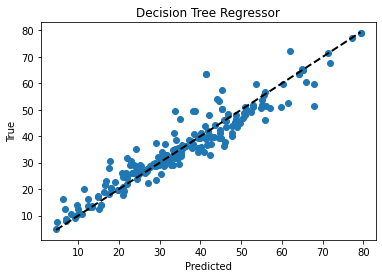

In [49]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

* The RMSE with Random Forest Regressor is now 5.11, we have reduced the error by ensembling multiple trees.

#### comparision

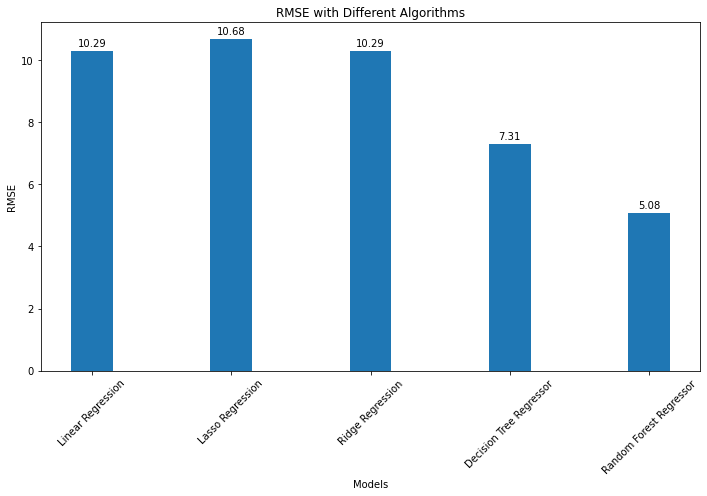

In [50]:
models = [lr, lasso, ridge, dtr, rfr]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

### Conclusion
* Random Forest Regressor is the best choice for this problem.